Code for testing and development of the function grouped_linear_regression_wild_bootstrap


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from janelia_core.stats.regression import grouped_linear_regression_wild_bootstrap

## Parameters go here

In [66]:
# Coefficients of the true model here
coefs = np.arange(10)

# Range of group offsets
grp_offset_range = [-10, 10]

# Range of group noise standard deviations
grp_std_range = [1, 10]

# Number of groups to sample
n_grps = 100

# Range of the number of samples to generate from each group
n_smps_per_group = [1, 5]

In [67]:
def gen_data(coefs, n_grps, n_smps_per_group, grp_offset_range, grp_std_range):

    n_coefs = len(coefs)

    grp_offsets = np.zeros(n_grps)
    grp_stds = np.zeros(n_grps)
    x_grp = [None]*n_grps
    y_grp = [None]*n_grps
    i_grp = [None]*n_grps

    for g_i in range(n_grps):
        n_grp_smps = np.random.randint(n_smps_per_group[0], n_smps_per_group[1] + 1)
    
        grp_offset = (np.random.rand(1)*(grp_offset_range[1] - grp_offset_range[0]) + 
                      grp_offset_range[0])
        grp_offsets[g_i] = grp_offset
    
        grp_std = (np.random.rand(1)*(grp_std_range[1] - grp_std_range[0]) + 
                   grp_std_range[0])
        grp_stds[g_i] = grp_std
    
        x_grp[g_i] = np.random.randn(n_grp_smps, n_coefs)
        y_grp[g_i] = (np.matmul(x_grp[g_i], coefs) + grp_std*np.random.randn(n_grp_smps) +
                      grp_offset)
        i_grp[g_i] = np.ones(n_grp_smps)*g_i
    
    x = np.concatenate(x_grp)
    y = np.concatenate(y_grp)
    grps = np.concatenate(i_grp)
    
    return [x, y, grps, grp_offsets]

## Testing code goes here

In [85]:
x, y, g, _ = gen_data(coefs, n_grps, n_smps_per_group, grp_offset_range, grp_std_range) 

In [86]:
p_vls = grouped_linear_regression_wild_bootstrap(y=y, x=x, g=g, n_bs_smps=100)

In [87]:
print(p_vls)

[0.   0.   0.   0.01 0.81 0.15 0.01 0.   0.   0.  ]


# Make sure that under then null hypothesis distributions of p-values are uniformly distributed

## Parameters go here

In [105]:
# Number of coefficents in the model
n_coefs = 2

# Range of group offsets
grp_offset_range = [-10, 10]

# Range of group noise standard deviations
grp_std_range = [1, 10]

# Number of groups to sample
n_grps = 10

# Range of the number of samples to generate from each group
n_smps_per_group = [1, 5]

# Number of simulations to perform
n_sims = 1000

# Number of bootstrap samples
n_bs_smps = 1000


In [106]:
p_vls = np.zeros([n_sims, n_coefs])

for s_i in range(n_sims):
    x, y, g, _ = gen_data(np.zeros(n_coefs), n_grps, n_smps_per_group, grp_offset_range, grp_std_range)
    
    p_vls[s_i, :] = grouped_linear_regression_wild_bootstrap(y=y, x=x, g=g, n_bs_smps=n_bs_smps)
    
    if s_i % 100 == 0:
        print('Done with simulation ' + str(s_i) + '.')

Done with simulation 0.
Done with simulation 100.
Done with simulation 200.
Done with simulation 300.
Done with simulation 400.
Done with simulation 500.
Done with simulation 600.
Done with simulation 700.
Done with simulation 800.
Done with simulation 900.


## Visualize distribution of p-values

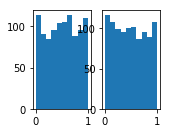

In [108]:
plt.figure()
for c_i in range(n_coefs):
    plt.subplot(2, 5, c_i+1)
    plt.hist(p_vls[:, c_i])